# Pregunta 1
Implementau un sistema expert en Python utilitzant CLIPSPY.

Podeu triar una de les següents tres aplicacions, en la línia dels apunts del tema.

    Mèdica, per exemple avaluació de l'activitat física.
    Hipotecària, com ara perfil del risc segons ingressos i estabilitat laboral.
    Legal, per exemple calcular l'impost de successions i donacions.

Si ho preferiu, també podeu triar un altre tema que sigui del vostre interès.

In [7]:
# Primera cel·la - Setup
from src.expert_system.exfisic import PhysicalActivityExpert

expert = PhysicalActivityExpert()

# Segona cel·la - Funció per provar un cas específic
test_cases = [
        {
            "name": "Principiant - Pèrdua de pes",
            "data": {
                "age": 30,
                "weight": 75,
                "height": 175,
                "activity_level": "low",
                "health_conditions": "none",
                "fitness_goal": "weight loss",
                "time_available": "normal"
            }
        },
        {
            "name": "Persona ocupada",
            "data": {
                "age": 35,
                "weight": 70,
                "height": 170,
                "activity_level": "moderate",
                "health_conditions": "none",
                "fitness_goal": "general fitness",
                "time_available": "limited"
            }
        },
        {
            "name": "Persona gran amb artritis",
            "data": {
                "age": 70,
                "weight": 65,
                "height": 165,
                "activity_level": "low",
                "health_conditions": "arthritis",
                "fitness_goal": "maintenance",
                "time_available": "normal"
            }
        }
    ]
    
for case in test_cases:
    print(f"\nTestejant: {case['name']}")
    print("Dades:", case['data'])
    recommendations = expert.get_recommendation(**case['data'])
    
    if recommendations:
        print("\nRecomanacions trobades:")
        for rec in recommendations:
            print("\nTipus d'exercici:", rec['exercise_type'])
            print("Intensitat:", rec['intensity'])
            print("Freqüència:", rec['frequency'])
            print("Duració:", rec['duration'])
            print("Exercicis específics:", rec['specific_exercises'])
            print("Pla de progressió:", rec['progression_plan'])
            print("Consells nutricionals:", rec['nutrition_advice'])
            print("Precaucions:", rec['precautions'])
    else:
        print("\nNo s'han trobat recomanacions per aquest cas!")
    
    print("-" * 80)


Testejant: Principiant - Pèrdua de pes
Dades: {'age': 30, 'weight': 75, 'height': 175, 'activity_level': 'low', 'health_conditions': 'none', 'fitness_goal': 'weight loss', 'time_available': 'normal'}

No s'han trobat recomanacions per aquest cas!
--------------------------------------------------------------------------------

Testejant: Persona ocupada
Dades: {'age': 35, 'weight': 70, 'height': 170, 'activity_level': 'moderate', 'health_conditions': 'none', 'fitness_goal': 'general fitness', 'time_available': 'limited'}

No s'han trobat recomanacions per aquest cas!
--------------------------------------------------------------------------------

Testejant: Persona gran amb artritis
Dades: {'age': 70, 'weight': 65, 'height': 165, 'activity_level': 'low', 'health_conditions': 'arthritis', 'fitness_goal': 'maintenance', 'time_available': 'normal'}

Recomanacions trobades:

Tipus d'exercici: Low Impact Training
Intensitat: Low
Freqüència: 2-3 times per week
Duració: 20-30 minutes
Exerci

# Pregunta 2
Triau un altre problema dels sis d'exemple que hi ha a la web arcprize.org i resoleu-lo seguint aquest guió.

    Definiu les graelles d'entrada i de sortida.
    Construïu les funcions auxiliars que necessiteu per resoldre el problema. Al problema del puzzle, aquestes funcions trobaven les peces horitzontals, verticals i quadrades.
    Construïu una funció de solució que utilitzi les auxiliars de l'apartat anterior.
    Comprovau que la solució a les entrades d'entrenament són les sortides corresponents.
    Comprovau que la solució a l'entrada de test correspon amb la solució de la web.

He triat el arcprize #6
Es cerca els quadrats coincidents en una matriu de 7x3 dividida per una linia vertical en la columna 4. (Puzzle ID: 0520fde7)



In [8]:
import numpy as np

def dividir_matriu(matrix, separator=-1):
    separator_index = np.where(matrix[0] == separator)[0][0]
    left = matrix[:, :separator_index]
    right = matrix[:, separator_index + 1:]
    return left, right

def unio_matriu(left, right):
    return np.logical_and(left, right)

matriu1 = np.array([
	[1, 0, 0, -1, 0, 1, 0],
	[0, 1, 0, -1, 1, 1, 1],
	[1, 0, 0, -1, 0, 0, 0]
])

m1div1, m1div2 = dividir_matriu(matriu1)
resposta1 = unio_matriu(m1div1, m1div2)

matriu2 = np.array([
	[1, 1, 0, -1, 0, 1, 0],
	[0, 0, 1, -1, 1, 1, 1],
	[1, 1, 0, -1, 0, 1, 0]
])

m2div1, m2div2 = dividir_matriu(matriu2)
resposta2 = unio_matriu(m2div1, m2div2)

matriu3 = np.array([
	[0, 0, 1, -1, 0, 0, 0],
	[1, 1, 0, -1, 1, 0, 1],
	[0, 1, 1, -1, 1, 0, 1]
])

m3div1, m3div2 = dividir_matriu(matriu3)
resposta3 = unio_matriu(m3div1, m3div2)

test = np.array([
    [0, 1, 0, -1, 0, 0, 0],
    [1, 1, 0, -1, 1, 0, 1],
    [0, 1, 0, -1, 0, 0, 1]
])

testdiv1, testdiv2 = dividir_matriu(test)
respostatest = unio_matriu(testdiv1, testdiv2)

print(resposta1)
print(resposta2)
print(resposta3)
print(respostatest)

[[False False False]
 [False  True False]
 [False False False]]
[[False  True False]
 [False False  True]
 [False  True False]]
[[False False False]
 [ True False False]
 [False False  True]]
[[False False False]
 [ True False False]
 [False False False]]


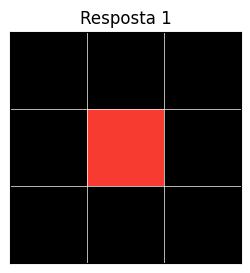

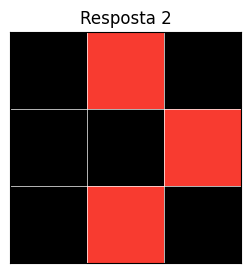

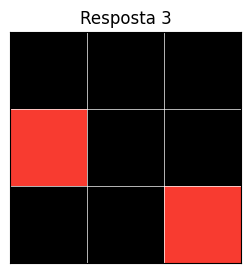

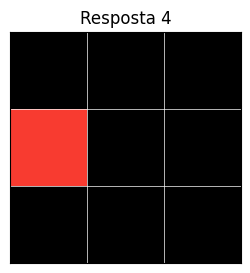

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_solution(grid, title):
    rows, cols = grid.shape
    plt.figure(figsize=(cols, rows))
    cmap = mcolors.ListedColormap(['#78716c', '#ef4444'])
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    plt.imshow(grid, cmap=cmap, norm=norm, origin='upper')
    # Add grid lines
    for r in range(rows + 1):
        plt.axhline(r - 0.5, color='white', linewidth=0.5)
    for c in range(cols + 1):
        plt.axvline(c - 0.5, color='white', linewidth=0.5)

    # Remove ticks from axis
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(which='both', bottom=False, left=False)
    plt.title(title)
    plt.show()

plot_solution(resposta1, 'Resposta 1')
plot_solution(resposta2, 'Resposta 2')
plot_solution(resposta3, 'Resposta 3')
plot_solution(respostatest, 'Resposta 4')